# Erasmus Neural Networks
http://michalbereta.pl/nn
## TensorFlow and Keras for MNIST


Keras: https://keras.io/

TensorFlow: https://www.tensorflow.org/

### Note !

Training exemplary neural networks in this notebook is computationally demanding. In case of problems, use the attached pretrained models  (files \*.hdf5).

### Check your configuration

In [ ]:
import tensorflow as tf
import keras as krs

print(tf.__version__)
print(krs.__version__)

## MNIST database


The MNIST database contains a training set consisting of 60,000 examples of scans of hand-written numbers from 0 to 9 (classification problem with 10 classes).

The test set contains 10,000 examples.

Each image has a size of 28x28 pixels. They constitute 28 * 28 = 784 inputs to the network.

In machine learning and image recognition community, the MNIST database serves as a kind of `Hello world` problem.


Read more about the MNIST database:

http://yann.lecun.com/exdb/mnist/



## Getting MNIST

The MNIST database can be downloaded in a binary version directly from the website:

http://yann.lecun.com/exdb/mnist/


In the form of csv files , the MNIST database is available on the website:

https://pjreddie.com/projects/mnist-in-csv/


The most convenient way, however, is to use the MNIST database import using the Keras library. At the first import, this database will be downloaded automatically (about 12MB). It will be placed in the directory `~ / .keras / datasets / mnist.pkl.gz`.

Below is an example code that reads training and test data, and displays several sample images.

In [ ]:
%matplotlib notebook
import tensorflow as tf
import keras as krs
import numpy as np

from keras.datasets import mnist
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

#wyswietlenie pierwszego przykladu
plt.imshow(xtest[0,:,:], cmap=plt.get_cmap('gray'))

#Wyswietlenie kilku pierwszych przykladow
rows = 8
cols = 10
counter = 0

images = None

for i in range(rows):
    current_row = None
    for j in range(cols):
        im = xtest[counter,:,:]
        counter = counter + 1
        if current_row is None:
            current_row = im
        else:
            current_row = np.hstack((current_row, im))
    if images is None:
        images = current_row
    else:
        images = np.vstack((images, current_row))
        
plt.figure()
plt.imshow(images, cmap=plt.get_cmap('gray'))

plt.show()

## MLP network with one layer hidden in the MNIST problem

We will check how the MNIST problem will be dealt with by the MLP neural network with one hidden layer.

### Imports

In [ ]:
import tensorflow as tf
import numpy
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import load_model
from keras.utils import np_utils

#If necessary, change the current catalog
#import os
#path = '.'
#os.chdir(path)

print(tf.__version__)
print(keras.__version__)

### Loading data

Please note that the data is stored as a 3-dimensional tensor.

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

### Seed initialization (to allow for repeatability of calculations)

In [ ]:
seed = 12345
numpy.random.seed(seed)

### Preparation of input data

The original 28x28 pixel images will be fed into the network input layer as vectors with a length of 784.

In addition, the normalization of pixel values from the interval [0.255] into interval [0,1] will have a positive impact on the network learning process.


In [ ]:
inputs_num = xtrain.shape[1] * xtrain.shape[2] #number of pixels = number of network inputs
xtrain = xtrain.reshape(xtrain.shape[0], inputs_num).astype('float32')
xtest = xtest.reshape(xtest.shape[0], inputs_num).astype('float32')

# normalize inputs from 0-255 to 0-1
xtrain = xtrain / 255
xtest = xtest / 255

print(xtrain.shape)
print(xtest.shape)

### Coding of class information (requested responses from 10 output neurons)

In [ ]:
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
num_classes = ytest.shape[1]
print(ytest.shape)

### Defining and compiling the model

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=inputs_num, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Saving the best model to a file

During the learning process, we can monitor selected metrics and save current network models to the file. This is useful for big problems, when network learning takes a very long time and loss of results in case of failure is an unpleasant experience.

In the following example, we monitor the quality of the classification on the validation set and save the model to the file, as long as it is better than any earlier (i.e., from earlier epochs).

In [ ]:
logger = keras.callbacks.ModelCheckpoint('mnist_model_MLP.hdf5', monitor='val_acc', verbose=0, save_best_only=True)


In [ ]:
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, batch_size=200, verbose=2, callbacks=[logger])

### Evaluation of the final and best model

In [ ]:
scores = model.evaluate(xtest, ytest, verbose=0)
print("Test error: %.2f%%" % (100-scores[1]*100))

#reading the best model from file
model2 = load_model('mnist_model_MLP.hdf5')
scores2 = model2.evaluate(xtest, ytest, batch_size=200)
print('network from file:')
print("Test error: %.2f%%" % (100-scores2[1]*100))

## The best results for MNIST 

How does our result compare the the best ones?

http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354

## Convolutional networks

Currently, some of the best models for image analysis are convolutional networks.

The basis of their functioning are:

- convolutional layers (sharing weights between neurons)
- MaxPooling layers (reduction of the dimensionality of the problem)
- ReLU type activation functions
- regularization, e.g. by the Dropout method

A popular model is a convolutional network in which a number of convolutional layers with ReLU activation functions alternate with MaxPooling layers. After that one or more layers of the MLP type follows (the designation FC means' Fully Connected`).

Often, there are layers implementing the Dropout type of regularization strategies, which are supposed to counteract the over-fitting of the model.

The following pictures are from http://cs231n.github.io/convolutional-networks/

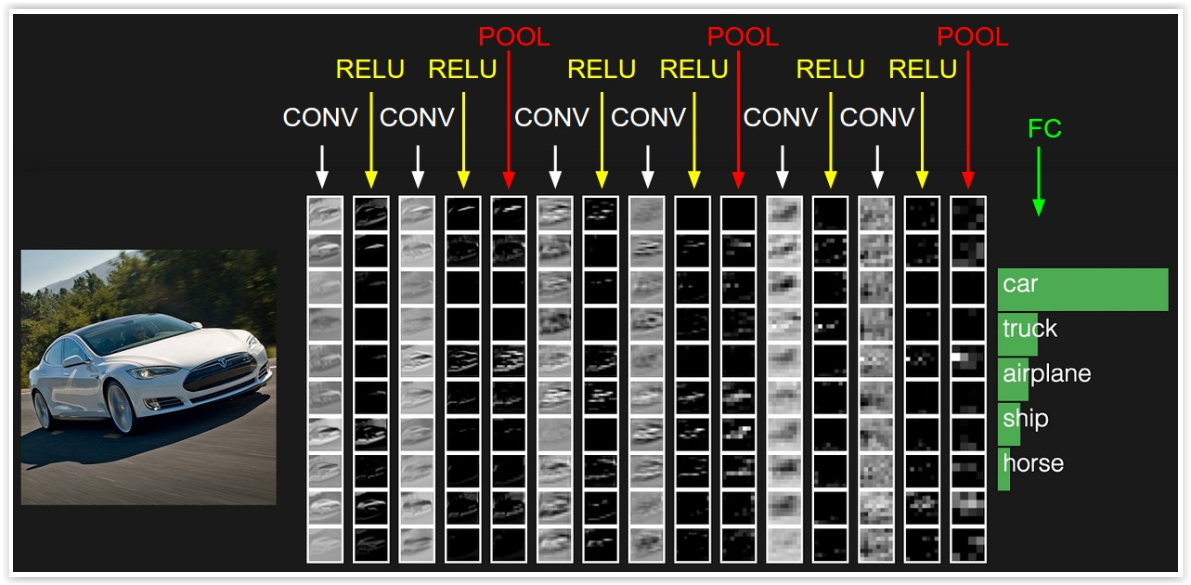

###  ReLU activation function

https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

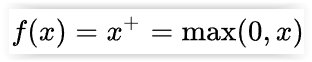

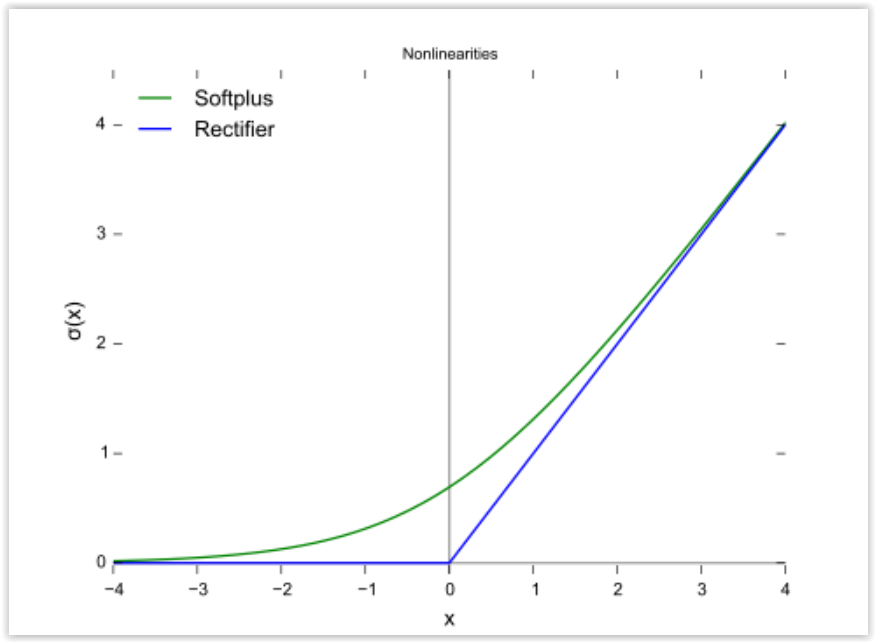

### Convolutional layers

The convolutional layer is a set of filters (neurons) that scan all channels of the input image (three in the example below). Scanning means that the weights of the same neuron are used repeatedly, which reduces the number of neurons needed.

The following example has two 3x3 filters, so the output of this convolutionary layer will be a new image with two channels (Output Volume).

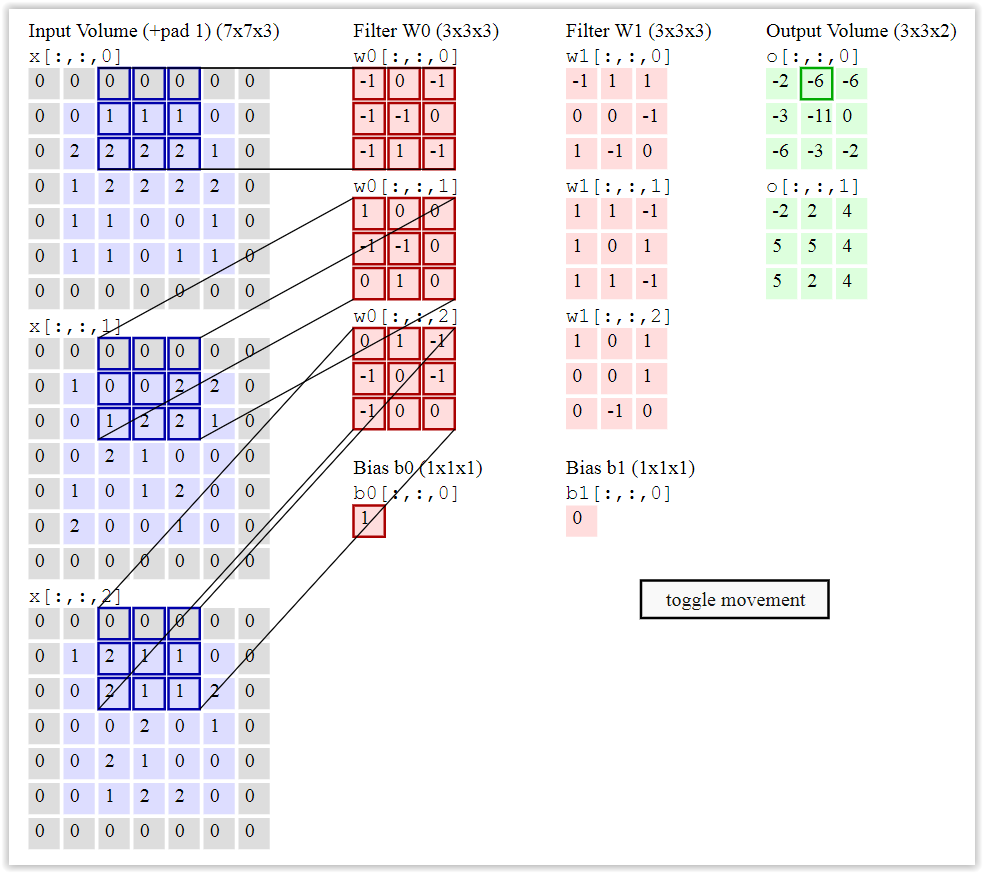

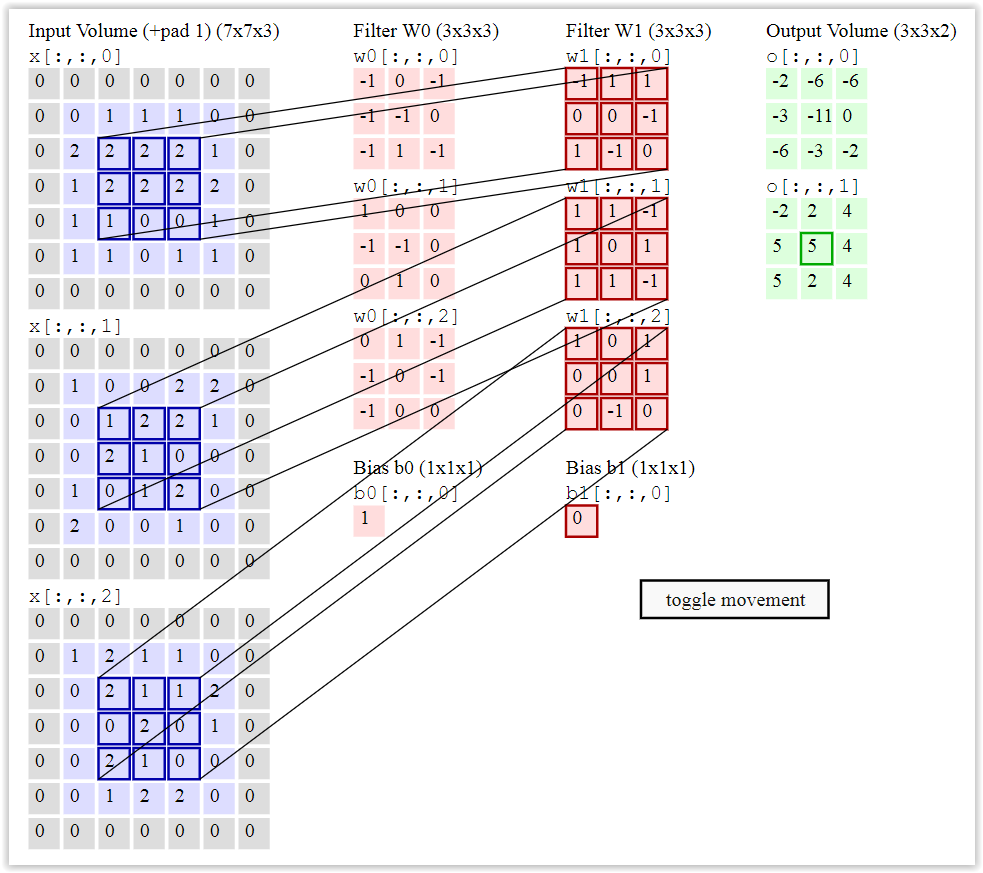

###  Max Pooling Layers

The Max Pooling layers are designed to limit the dimensionality of data transferred to subsequent layers. From each selected area (eg 2x2 pixels), the maximum value is selected.

Please note that pooling does not change the "depth" (number of channels).

For example:

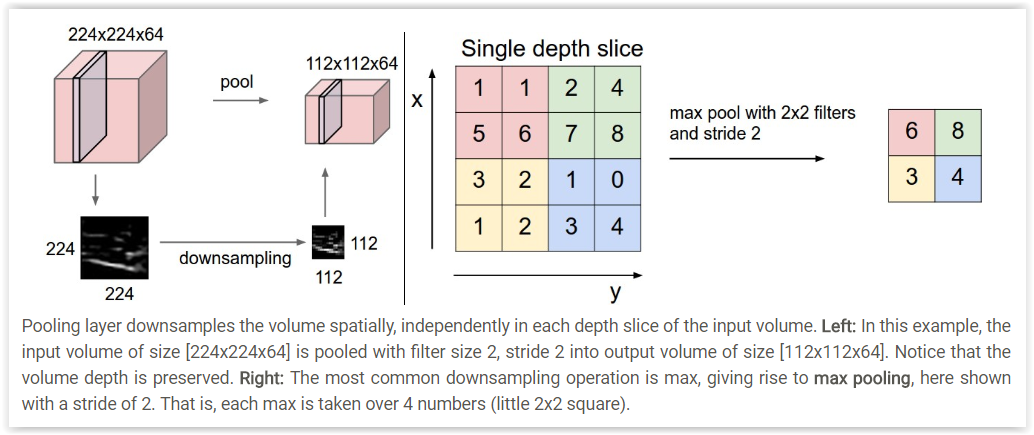

## Implementation of a simple convolutional network with Keras 

The designed network will have only one convolutional layer, followed by one hidden MLP layer. The output of the entire network will be another layer of the `softmax` type.


### Imports and data loading

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import load_model
from keras.utils import np_utils

#import os
#path = '.'
#os.chdir(path)

print(tf.__version__)
print(keras.__version__)

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)


seed = 12345
np.random.seed(seed)

### Data preparation

Please note that the network inputs are now images, not one-dimensional data. The convolutional layer expects data with the dimensions `(width, height, number of channels)`. In our MNIST example, the images are 28x28x1 (one channel, monochrome images).

Please note the appropriate use of the `reshape` function.

It is also possible to use the input data in the form `(number of channels, width, height)`

In [ ]:
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1).astype('float32')
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
xtrain = xtrain / 255
xtest = xtest / 255

# one hot encode outputs
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
num_classes = ytest.shape[1]

### Defining and compiling the model

The first layer is a convolution layer consisting of 32 filters with a size of 5x5 and a ReLU activation function.

Please note that it was given directly

`data_format='channel_last'`

that is, data should have the format `(width, height, number of channels)`, in this example 28x28x1.

The `Flatten` layer converts multidimensional data into one-dimensional, so that it can be used as another layer of MLP.

The `Dropout (0.2)` layer means that each time 20% of random neurons will be excluded from network activity. This is to prevent the network from overfitting.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training


In [ ]:
logger = keras.callbacks.ModelCheckpoint('mnist_model_CONV_SIMPLE.hdf5', monitor='val_acc', verbose=0, save_best_only=True)

# Fit the model
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, batch_size=200, verbose=2, callbacks=[logger])

### Testing

In [ ]:
scores = model.evaluate(xtest, ytest, verbose=0)
print("Test error: %.2f%%" % (100-scores[1]*100))

#Best model
model2 = load_model('mnist_model_CONV_SIMPLE.hdf5')
scores2 = model2.evaluate(xtest, ytest, batch_size=200)
print('The best network from file:')
print("Test error: %.2f%%" % (100-scores2[1]*100))

## A bigger convolutional network

Compare previous results with the results of the following network. Read its architecture.

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import load_model
from keras.utils import np_utils

#import os
#path = '.'
#os.chdir(path)

print(tf.__version__)
print(keras.__version__)

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

# fix random seed
seed = 12345
np.random.seed(seed)


xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1).astype('float32')
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1).astype('float32')

# normalize inputs from 0-255 to 0-1
xtrain = xtrain / 255
xtest = xtest / 255

# one hot encode outputs
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
num_classes = ytest.shape[1]

# define model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

logger = keras.callbacks.ModelCheckpoint('mnist_model_CONV_BIGGER.hdf5', monitor='val_acc', verbose=0, save_best_only=True)

# Fit the model
model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=20, batch_size=200, verbose=2, callbacks=[logger])

# Final evaluation of the model
scores = model.evaluate(xtest, ytest, verbose=0)
print("Test error: %.2f%%" % (100-scores[1]*100))

#Best model
model2 = load_model('mnist_model_CONV_BIGGER.hdf5')
scores2 = model2.evaluate(xtest, ytest, batch_size=200)
print('The best network from the file:')
print("Test error: %.2f%%" % (100-scores2[1]*100))

print('end')

## Comparing the models

In case of problems with training, attached files

- `_mnist_model_MLP.hdf5`
- `_mnist_model_CONV_SIMPLE.hdf5`
- `_mnist_model_CONV_BIGGER.hdf5`

contain previously trained models.

Use the following script to compare their actions. How far are these models from the best known?

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.models import load_model
from keras.utils import np_utils

#import os
#path = '.'
#os.chdir(path)

print(tf.__version__)
print(keras.__version__)

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('xtrain.shape',xtrain.shape)
print('ytrain.shape',ytrain.shape)
print('xtest.shape',xtest.shape)
print('ytest.shape',ytest.shape)

xtrain = xtrain.reshape(xtrain.shape[0], 784).astype('float32')
xtest = xtest.reshape(xtest.shape[0], 784).astype('float32')

# normalize inputs from 0-255 to 0-1
xtrain = xtrain / 255
xtest = xtest / 255

# one hot encode outputs
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

#Compare the networks

#MLP
model = load_model('_mnist_model_MLP.hdf5')
scores = model.evaluate(xtest, ytest, batch_size=200)
print("Test error (Model MLP): %.2f%%" % (100-scores[1]*100))


xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1).astype('float32')
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1).astype('float32')

#Smaller conv net
model = load_model('_mnist_model_CONV_SIMPLE.hdf5')
scores = model.evaluate(xtest, ytest, batch_size=200)
print("Test error (Model CONV SIMPLE): %.2f%%" % (100-scores[1]*100))

#Bigger conv net
model = load_model('_mnist_model_CONV_BIGGER.hdf5')
scores = model.evaluate(xtest, ytest, batch_size=200)
print("Test error (Model CONV BIGGER): %.2f%%" % (100-scores[1]*100))

print('end')

### Task 1

- Prepare and train a convolutional neural network on CIFAR-10 database. 
- Try different architectures of networks
- Compare and report the results


#### YOUR DESCRIPTION AND COMMENTS

In [ ]:
#YOUR CODE HERE

### Task 2

NOT OBLIGATORY, DO IT ONLY IF YOU WANT!

- Collect your own images from different categories and train different networks to recognize them.

- Provide the best models saved in files together with a script to load and test them.

#### YOUR DESCRIPTION AND COMMENTS

In [ ]:
#YOUR CODE HERE